In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import methylprep
import methylcheck
from pprint import pprint as pp
mprep_minfi_path = Path('/Volumes/LEGX/GEO/test_pipeline/GSE105018_0722') # methylprep --all --minfi v1.5.3
mprep_ses_path = Path('/Volumes/LEGX/GEO/test_pipeline/GSE105018_ses0722') # methylprep --all v1.5.3
m_v111 = Path('/Volumes/LEGX/GEO/test_pipeline/GSE105018_v111') # methylprep --betas v1.1.1 2019 version
m_v146 = Path('/Volumes/LEGX/GEO/test_pipeline/GSE105018_v146') # methylprep --betas v1.4.6 March-2021 version --minfi
m_v160 = Path('/Volumes/LEGX/GEO/test_pipeline/GSE105018_v160') # methylprep --betas v1.6.0 Jan-2022 version --minfi 
# m_v160: python -m methylprep process -d . --minfi
m_v160_ses = Path('/Volumes/LEGX/GEO/test_pipeline/GSE105018_v160_ses') # methylprep --betas v1.6.0 Jan-2022 sesame (default)
# m_v160_ses: python -m methylprep process -d . --all
minpath = Path('/Volumes/LEGX/GEO/test_pipeline/GSE105018_minfi')
sespath = Path('/Volumes/LEGX/GEO/test_pipeline/GSE105018_sesame')
FIGURES = Path('/Users/mmaxmeister/Documents')

In [2]:
m_v111_samples = {}
for _csv in Path(m_v111, '3999356047').rglob('*'):
    sample_name = '_'.join(Path(_csv).stem.split('_')[:2])
    sample = pd.read_csv(_csv).set_index('IlmnID')
    m_v111_samples[sample_name] = sample

m_v146_samples = {}
for _csv in Path(m_v146, '3999356047').rglob('*'):
    sample_name = '_'.join(Path(_csv).stem.split('_')[:2])
    sample = pd.read_csv(_csv).set_index('IlmnID')
    m_v146_samples[sample_name] = sample
  
mprep_minfi_beta = pd.read_pickle(Path(mprep_minfi_path,'beta_values.pkl')).sort_index()['3999356047_R01C01']
mprep_ses_beta = pd.read_pickle(Path(mprep_ses_path,'beta_values.pkl')).sort_index()['3999356047_R01C01']

ses_beta = pd.read_csv(Path(sespath, 'sesame_betas.csv')).set_index('Unnamed: 0').sort_index()['GSM2815705_3999356047_R01C01']
ses_beta.index.name = 'IlmnID'
ses_beta = ses_beta[ ~ses_beta.index.str.startswith('rs') ]
minfi_beta = pd.read_csv(Path(minpath, 'minfi_noob_beta.csv')).set_index('Unnamed: 0').sort_index()['GSM2815705_3999356047_R01C01']
minfi_beta.index.name = 'IlmnID'

In [3]:

mprep_minfi_beta.shape, minfi_beta.shape, mprep_ses_beta.shape, ses_beta.shape

((485512,), (485512,), (485512,), (485512,))

# beta values: methylprep vs sesame

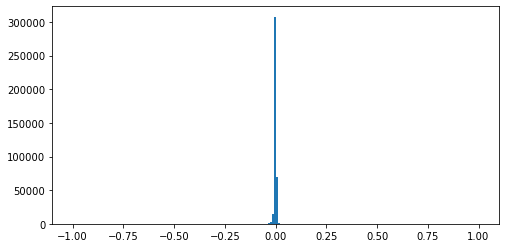

In [4]:
(mprep_ses_beta - ses_beta).hist(bins=200, range=[-1.0,1.0], figsize=(8,4))
plt.savefig(Path(FIGURES,'paper-methylprep-vs-sesame.png'), dpi=300, facecolor='w')
plt.grid(color='lightgray')# , linestyle='dotted') #, linewidth=0.7)
plt.show()

# beta values: methylprep vs minfi

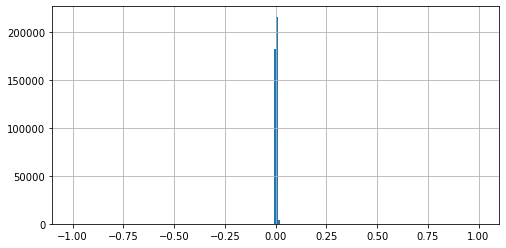

In [5]:
(mprep_minfi_beta - minfi_beta).hist(bins=200, range=[-1.0,1.0], figsize=(8,4))
plt.savefig(Path(FIGURES,'paper-methylprep-vs-minfi.png'), dpi=300, facecolor='w')
plt.show()

# beta values: sesame vs minfi

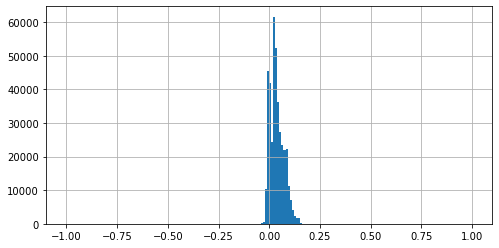

In [6]:
(ses_beta - minfi_beta.sort_index()).hist(bins=200, range=[-1.0,1.0], figsize=(8,4))
plt.savefig(Path(FIGURES,'paper-sesame-vs-minfi.png'), dpi=300, facecolor='w')
plt.show()

#### mprep v160 CSV beta values --vs-- minfi betas

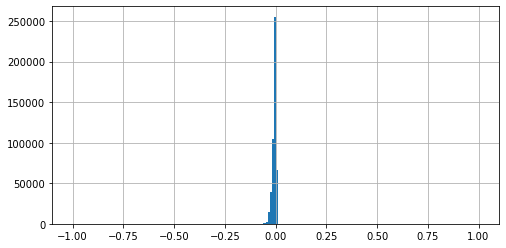

In [7]:
m_v160_samples = {}
for _csv in Path(m_v160, '3999356047').rglob('*'):
    sample_name = '_'.join(Path(_csv).stem.split('_')[:2])
    sample = pd.read_csv(_csv).set_index('IlmnID')
    m_v160_samples[sample_name] = sample

mprep_s160 = m_v160_samples['3999356047_R01C01']['beta_value']
mprep_s160 = mprep_s160[ ~mprep_s160.index.str.startswith('rs') ]

(mprep_s160 - minfi_beta).hist(bins=200, range=[-1.0,1.0], figsize=(8,4))
plt.show()

#### mprep v160_ses CSV beta values (using --all) --vs-- sesame betas

In [8]:
m_v160_ses_samples = {}
for _csv in Path(m_v160_ses, '3999356047').rglob('*'):
    sample_name = '_'.join(Path(_csv).stem.split('_')[:2])
    sample = pd.read_csv(_csv).set_index('IlmnID')
    m_v160_ses_samples[sample_name] = sample

mprep_s160_ses = m_v160_ses_samples['3999356047_R01C01']['beta_value']
mprep_s160_ses = mprep_s160_ses[ ~mprep_s160_ses.index.str.startswith('rs') ]


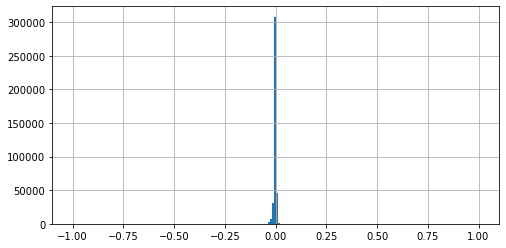

In [9]:
(mprep_s160_ses - ses_beta).hist(bins=200, range=[-1.0,1.0], figsize=(8,4))
plt.show()

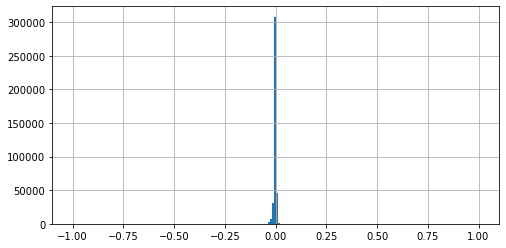

In [10]:
## note that NA probes in sesame output are ignored:

mprep_s160_ses_no_NaN = mprep_s160_ses[ ses_beta.notna()]
(mprep_s160_ses_no_NaN - ses_beta).hist(bins=200, range=[-1.0,1.0], figsize=(8,4))
plt.show()

In [11]:
print(f"mprep 1.6 vs sesame avg {round((mprep_s160_ses_no_NaN - ses_beta).mean(),4)} ({round(100*(mprep_s160_ses_no_NaN - ses_beta).mean(),2)}%) sem {round((mprep_s160_ses_no_NaN - ses_beta).sem(),6)}")
print(f"mprep 1.6 vs minfi avg {round((mprep_s160 - minfi_beta).mean(),4)} ({round(100*(mprep_s160 - minfi_beta).mean(),2)}%) sem {round((mprep_s160 - minfi_beta).sem(),6)}")
print(f"sesame vs minfi {round((ses_beta - minfi_beta).mean(),4)} ({round(100*(ses_beta - minfi_beta).mean(),2)}%) sem {round((ses_beta - minfi_beta).sem(),6)}")


mprep 1.6 vs sesame avg -0.0035 (-0.35%) sem 6.4e-05
mprep 1.6 vs minfi avg -0.0088 (-0.88%) sem 6.1e-05
sesame vs minfi 0.0374 (3.74%) sem 5.8e-05


In [12]:
0.000064, 0.000061


(6.4e-05, 6.1e-05)